Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded 5000 rows


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
113/113 - 2s - 14ms/step - loss: 0.3545 - mse: 0.3545 - val_loss: 0.1066 - val_mse: 0.1066
Epoch 2/50
113/113 - 0s - 4ms/step - loss: 0.0754 - mse: 0.0754 - val_loss: 0.0426 - val_mse: 0.0426
Epoch 3/50
113/113 - 0s - 2ms/step - loss: 0.0351 - mse: 0.0351 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 4/50
113/113 - 0s - 3ms/step - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 5/50
113/113 - 0s - 3ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 6/50
113/113 - 0s - 3ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 7/50
113/113 - 0s - 3ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 8/50
113/113 - 0s - 3ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 9/50
113/113 - 0s - 3ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 10/50
113/113 - 0s - 2ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0044 - val_

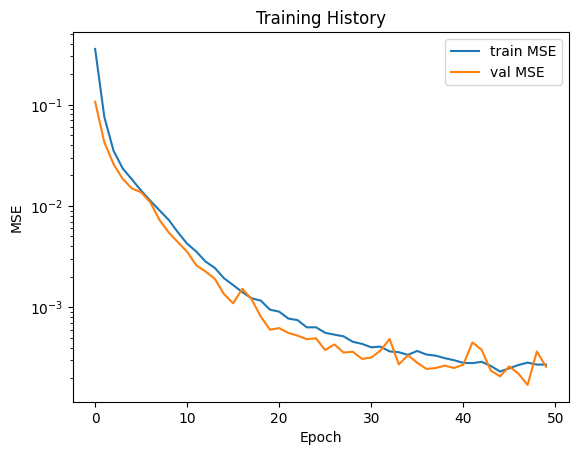

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test MSE: 2.841e+06,  R²: 0.9997


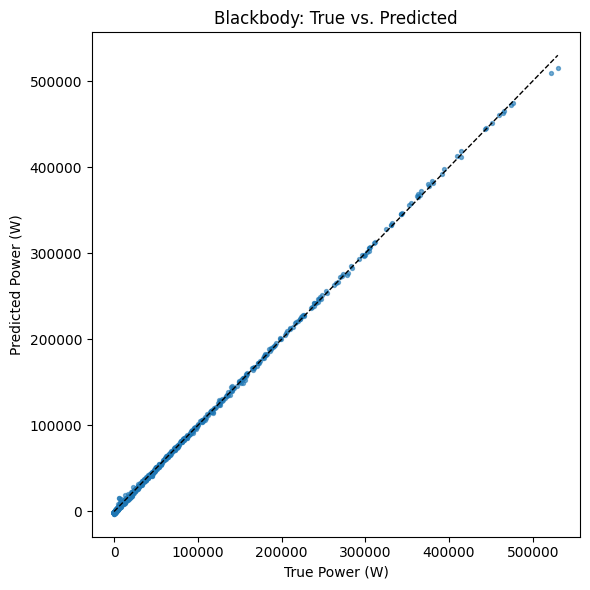

In [3]:
# 1) Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2) Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential, layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 3) Load the data
path = '/content/drive/MyDrive/neural/blackbody_data.csv'
df = pd.read_csv(path)
print("Loaded", len(df), "rows")

# 4) Split features/target
X = df[['Temperature_K','Area_m2']].values   # shape (N,2)
y = df[['Power_W']].values                    # shape (N,1)

# 5) Train/Test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# 6) Standardize inputs & outputs
x_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_s = x_scaler.transform(X_train)
X_test_s  = x_scaler.transform(X_test)

y_train_s = y_scaler.transform(y_train)
y_test_s  = y_scaler.transform(y_test)

# 7) Build the regression NN
model = Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1,  activation='linear'),
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss='mse',
    metrics=['mse']
)
model.summary()

# 8) Train (with 10% of train as validation)
history = model.fit(
    X_train_s, y_train_s,
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    verbose=2
)

# 9) Plot training & validation loss
plt.figure()
plt.plot(history.history['loss'], label='train MSE')
plt.plot(history.history['val_loss'], label='val MSE')
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.title('Training History')
plt.show()

# 10) Evaluate on test set
y_pred_s = model.predict(X_test_s)
y_pred   = y_scaler.inverse_transform(y_pred_s)

mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
print(f"Test MSE: {mse:.3e},  R²: {r2:.4f}")

# 11) True vs Predicted scatter
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, s=8, alpha=0.6)
lims = [y.min(), y.max()]
plt.plot(lims, lims, 'k--', lw=1)
plt.xlabel('True Power (W)')
plt.ylabel('Predicted Power (W)')
plt.title('Blackbody: True vs. Predicted')
plt.tight_layout()
plt.show()
